# Notebook for visualizing midterm results

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

### Create pandas dataframe with column names for quiz data

In [4]:
file = '/Users/maltegueth/Documents/midterms_scores.csv'

questions = [str(x) for x in range(1,41)]

columns = ['student', 'percent', 'score', 'corrects', 'blanks'] + questions
data = pd.read_csv(file, sep=',', names=columns)
data['quiz'] = 7

In [5]:
data[:10]

,student,percent,score,corrects,blanks,1,2,3,4,5,...,32,33,34,35,36,37,38,39,40,quiz
0,170003458,50,20,20,0,A,C,A,D,A,...,A,D,C,A,C,C,B,C,D,7
1,180002226,55,22,22,0,B,A,B,A,C,...,A,B,B,C,B,B,C,D,C,7
2,180006747,58,23,23,0,A,A,A,A,A,...,B,C,B,A,B,B,D,D,D,7
3,179000933,63,25,25,0,B,C,B,A,B,...,B,C,B,A,B,C,C,C,C,7
4,182007192,63,25,25,0,B,D,A,A,C,...,B,C,B,A,B,B,C,A,B,7
5,172005907,63,25,25,0,B,B,A,A,B,...,B,C,D,A,A,B,C,A,A,7
6,197001059,65,26,26,0,B,C,A,A,B,...,B,C,B,A,B,A,A,D,C,7
7,190009075,70,28,28,0,B,C,A,A,C,...,A,B,D,A,B,B,D,D,D,7
8,173002715,70,28,28,0,B,C,A,C,B,...,B,C,B,D,A,B,C,A,D,7
9,175001097,75,30,30,0,B,C,A,A,B,...,A,B,B,A,B,B,C,B,A,7


# Here are some basic stats from the dataframe (mean, median, sd)

In [6]:
data.percent.mean()

78.91891891891892

In [7]:
data.percent.median()

80.0

In [8]:
data.percent.std()

11.804844529020887

# Next, check some distributional plots to visualize how the class as a whole scored

In [9]:
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

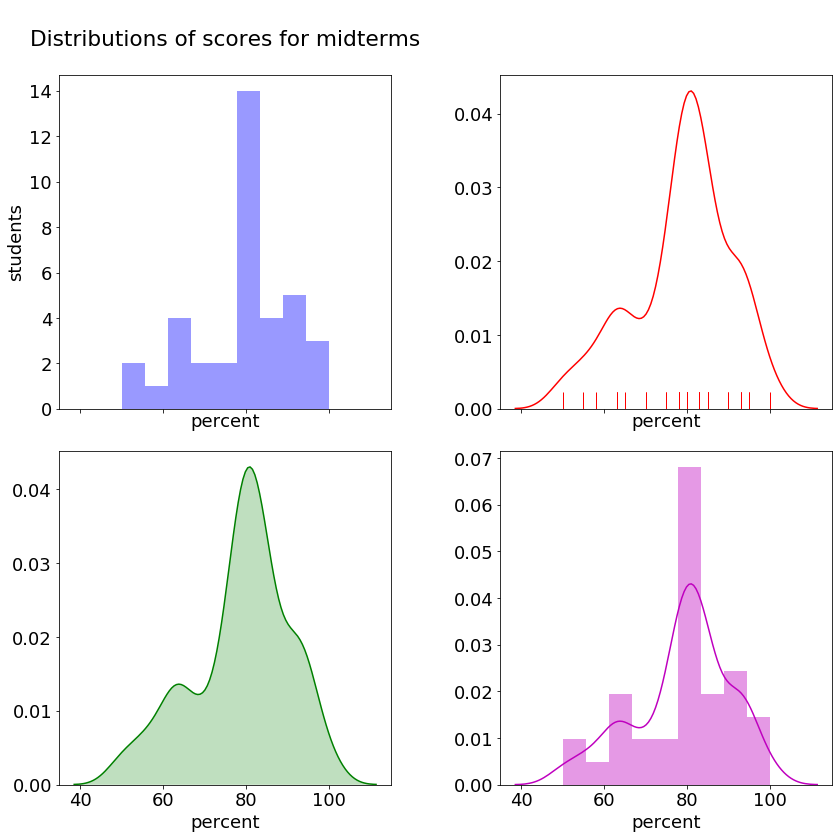

In [10]:
fig1, axes = matplotlib.pyplot.subplots(2, 2, figsize=(12, 12), sharex=True)

ax = sns.distplot(data['percent'], kde=False, color="b", ax=axes[0,0])
sns.distplot(data['percent'], hist=False, rug=True, color="r", ax=axes[0, 1])
sns.distplot(data['percent'], hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(data['percent'], color="m", ax=axes[1, 1])

ax.set(ylabel='students')
ax.set(title='\nDistributions of scores for midterms\n')
matplotlib.pyplot.tight_layout()